## Project - Domain: 
Telecommunications

## Objective: 
Understand the application of machine learning algorithms in real world scenarios and 
implement the classification techniques to solve 
the near real time use case from telecommunications domain.


## Problem Statement:
A telecom company has the following data related to its subscribers. It wants to find out the potential churners and to turn them into regular customers 
by retaining them.
Our Aim is to protect our customers without churning from our company. It can be achieved through best 
model building based on best features using various machine learning algorithms and get good insights 
from the data which can help improve company’s business

## Attribute information:
Cust_Id : An Unique value for each Customer.

International.Plan : Whether the customer has International plan or not.

Voice.Mail.Plan : Whether the customer has Voice Mail plan or not.

X..Vmail.Messages : Number of Voicemail messages customer has sent.

Total.Day.Minutes : Total call duration taken by customer per Day in minutes.

Total.Day.Calls : Number of calls in total customer did per Day.

Total.Day.Charge : Total Charges accordingly per Day.

Total.Eve.Minutes : Total Number of minutes taken by customer in the Evening.

Total.Eve.Calls : Total Number of calls made by customer in the Evening.

Total.Eve.Charge : Total Charges accordingly per Evening calls.

Total.Night.Minutes : Total Number of minutes taken by customer in the Night.

Total.Night.Calls : Total Number of calls made by customer in the Night.

Total.Night.Charge : Total Charges accordingly per Night calls.

Total.Intl.Minutes : Total Number of minutes taken by customer for International calls.

Total.Intl.Calls : Total Number of International calls made by customer.

Total.Intl.Charge : Total Charges accordingly per International calls.

X..customer.Service.Calls : Number of calls made by customer.

Churn : Whether that customer churn out of the company or not.

Trainrows : For Splitting Data into Train & Test sets.

## Import all the required libraries

In [ ]:
#importing the required libraries 
import os
import numpy as np # importing for numeric operations
import pandas as pd # importing for data analysis


#importing libraries for visualization
import matplotlib.pyplot as plt # for data visualization & graphical plotting 
import seaborn as sns #for statistical graphics
%matplotlib inline

from sklearn.model_selection import train_test_split #for splitting the data into train and test

## for standardize and Encoding the data
from sklearn.preprocessing import StandardScaler,OneHotEncoder

# for model Building 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier ,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from xgboost import XGBClassifier

# for evaluate the model performance
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score,classification_report

# for search the best parameter values from the given set of the grid of parameters
from sklearn.model_selection import GridSearchCV
import graphviz

Mounting the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


To Ignore the warnings

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Reading All the datasets from the Drive

In [ ]:
Telco_Churn_Details1= pd.read_csv("/content/drive/My Drive/Turingminds/MachineLearning/ML_Project/Telco_Churn_Details1.csv")
Telco_Churn_Details2= pd.read_csv("/content/drive/My Drive/Turingminds/MachineLearning/ML_Project/Telco_Churn_Details2.csv")
Telco_Customer_Call_Details1= pd.read_csv("/content/drive/My Drive/Turingminds/MachineLearning/ML_Project/Telco_Customer_Call_Details1.csv")
Telco_Customer_Call_Details2= pd.read_csv("/content/drive/My Drive/Turingminds/MachineLearning/ML_Project/Telco_Customer_Call_Details2.csv") 

Checking the dimensions (rows and columns)

In [ ]:
print(Telco_Churn_Details1.shape)
print(Telco_Churn_Details2.shape)
print(Telco_Customer_Call_Details1.shape)
print(Telco_Customer_Call_Details2.shape)

(500, 7)
(4500, 7)
(500, 13)
(4500, 13)


# Observing the top and bottom 5 records of the data:

In [ ]:
Telco_Churn_Details1.head()

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
0,101,no,yes,25,1,False.,No
1,102,no,yes,26,1,False.,Yes
2,103,no,no,0,0,False.,Yes
3,104,yes,no,0,2,False.,Yes
4,105,yes,no,0,3,False.,Yes


In [ ]:
Telco_Churn_Details1.tail()

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
495,596,yes,no,0,2,False.,Yes
496,597,no,yes,36,2,False.,Yes
497,598,no,no,0,2,False.,Yes
498,599,yes,no,0,4,True.,Yes
499,600,no,no,0,1,False.,No


In [ ]:
Telco_Churn_Details2.head()

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
0,601,no,yes,23,3,False.,Yes
1,602,no,yes,28,1,False.,Yes
2,603,yes,no,0,1,True.,Yes
3,604,yes,yes,26,0,False.,Yes
4,605,no,no,0,0,False.,Yes


In [ ]:
Telco_Churn_Details2.tail()

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
4495,5096,no,yes,40,2,False.,Yes
4496,5097,no,no,0,3,True.,Yes
4497,5098,no,no,0,1,False.,Yes
4498,5099,no,no,0,0,False.,Yes
4499,5100,no,yes,34,0,False.,Yes


In [ ]:
Telco_Customer_Call_Details1.head()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,101,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,102,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,103,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,104,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,105,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [ ]:
Telco_Customer_Call_Details1.tail()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
495,596,156.1,114,26.54,180.3,63,15.33,179.6,115,8.08,11.1,9,3.00
496,597,178.7,134,30.38,178.6,102,15.18,126.8,82,5.71,8.0,4,2.16
497,598,177.5,93,30.18,287.4,75,24.43,180.5,118,8.12,11.9,3,3.21
498,599,211.3,61,35.92,105.6,119,8.98,175.9,63,7.92,9.7,4,2.62
499,600,175.2,91,29.78,244.4,109,20.77,75.8,95,3.41,7.5,2,2.03


In [ ]:
Telco_Customer_Call_Details2.head()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,601,114.3,102,19.43,190.3,103,16.18,240.4,111,10.82,12.6,7,3.40
1,602,251.4,104,42.74,225.1,89,19.13,251.9,121,11.34,7.5,5,2.03
2,603,216.9,61,36.87,207.4,120,17.63,221.7,110,9.98,17.5,5,4.73
3,604,217.2,138,36.92,145.5,111,12.37,280.7,76,12.63,9.3,3,2.51
4,605,206.3,97,35.07,154.9,98,13.17,263.6,82,11.86,12.4,12,3.35


In [ ]:
Telco_Customer_Call_Details1.tail()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
495,596,156.1,114,26.54,180.3,63,15.33,179.6,115,8.08,11.1,9,3.00
496,597,178.7,134,30.38,178.6,102,15.18,126.8,82,5.71,8.0,4,2.16
497,598,177.5,93,30.18,287.4,75,24.43,180.5,118,8.12,11.9,3,3.21
498,599,211.3,61,35.92,105.6,119,8.98,175.9,63,7.92,9.7,4,2.62
499,600,175.2,91,29.78,244.4,109,20.77,75.8,95,3.41,7.5,2,2.03


## Concating Two Data Set Into One DataSet

In [ ]:
Telco_Churn_Details = pd.concat([Telco_Churn_Details1, Telco_Churn_Details2], axis=0,ignore_index=True)

In [ ]:
Telco_Customer_Call_Details=pd.concat([Telco_Customer_Call_Details1, Telco_Customer_Call_Details2], axis=0 ,ignore_index=True)

After concat two dataset
 Checking the dimensions (rows and columns)

In [ ]:
print(Telco_Churn_Details.shape)
print(Telco_Customer_Call_Details.shape)

(5000, 7)
(5000, 13)


Observing the top & bottom 5 rows

In [ ]:
Telco_Churn_Details.head()

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
0,101,no,yes,25,1,False.,No
1,102,no,yes,26,1,False.,Yes
2,103,no,no,0,0,False.,Yes
3,104,yes,no,0,2,False.,Yes
4,105,yes,no,0,3,False.,Yes


In [ ]:
Telco_Churn_Details.tail()

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows
4995,5096,no,yes,40,2,False.,Yes
4996,5097,no,no,0,3,True.,Yes
4997,5098,no,no,0,1,False.,Yes
4998,5099,no,no,0,0,False.,Yes
4999,5100,no,yes,34,0,False.,Yes


In [ ]:
Telco_Customer_Call_Details.head()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,101,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,102,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,103,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,104,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,105,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [ ]:
Telco_Customer_Call_Details.tail()

,Cust_ID,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
4995,5096,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67
4996,5097,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97
4997,5098,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67
4998,5099,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30
4999,5100,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51


## Marging the Two DataSet into One Dataet with the help of "Cust_ID"

In [ ]:
Telco_data = pd.merge(Telco_Churn_Details, Telco_Customer_Call_Details, how="left", on="Cust_ID" )

Saving The Dataset By giving The storage Path

In [ ]:
#Telco_data.to_csv('/content/drive/My Drive/Turingminds/MachineLearning/ML_Project/Telco_data.csv',index=False)

## _Exploratory Data Analysis_

Checking the dimensions (rows and columns)

In [ ]:
Telco_data.shape

(5000, 19)

Observing the top and bottom 5 records of the data:

In [ ]:
Telco_data.head()

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
0,101,no,yes,25,1,False.,No,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70
1,102,no,yes,26,1,False.,Yes,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70
2,103,no,no,0,0,False.,Yes,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29
3,104,yes,no,0,2,False.,Yes,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78
4,105,yes,no,0,3,False.,Yes,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73


In [ ]:
Telco_data.tail()

,Cust_ID,International.Plan,Voice.Mail.Plan,X..Vmail.Messages,X..customer.Service.Calls,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
4995,5096,no,yes,40,2,False.,Yes,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67
4996,5097,no,no,0,3,True.,Yes,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97
4997,5098,no,no,0,1,False.,Yes,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67
4998,5099,no,no,0,0,False.,Yes,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30
4999,5100,no,yes,34,0,False.,Yes,129.4,102,22.00,267.1,104,22.70,154.8,100,6.97,9.3,16,2.51


Checking the datatype of each variable

In [ ]:
Telco_data.dtypes

Cust_ID                        int64
International.Plan            object
Voice.Mail.Plan               object
X..Vmail.Messages              int64
X..customer.Service.Calls      int64
Churn                         object
trainrows                     object
Total.Day.Minutes            float64
Total.Day.Calls                int64
Total.Day.Charge             float64
Total.Eve.Minutes            float64
Total.Eve.Calls                int64
Total.Eve.Charge             float64
Total.Night.Minutes          float64
Total.Night.Calls              int64
Total.Night.Charge           float64
Total.Intl.Minutes           float64
Total.Intl.Calls               int64
Total.Intl.Charge            float64
dtype: object

Observing the columns name

In [ ]:
Telco_data.columns

Index(['Cust_ID', 'International.Plan', 'Voice.Mail.Plan', 'X..Vmail.Messages',
       'X..customer.Service.Calls', 'Churn', 'trainrows', 'Total.Day.Minutes',
       'Total.Day.Calls', 'Total.Day.Charge', 'Total.Eve.Minutes',
       'Total.Eve.Calls', 'Total.Eve.Charge', 'Total.Night.Minutes',
       'Total.Night.Calls', 'Total.Night.Charge', 'Total.Intl.Minutes',
       'Total.Intl.Calls', 'Total.Intl.Charge'],
      dtype='object')

Checking the number of unique levels in each attribute

In [ ]:
Telco_data.nunique()

Cust_ID                      5000
International.Plan              2
Voice.Mail.Plan                 2
X..Vmail.Messages              48
X..customer.Service.Calls      10
Churn                           2
trainrows                       2
Total.Day.Minutes            1961
Total.Day.Calls               123
Total.Day.Charge             1961
Total.Eve.Minutes            1879
Total.Eve.Calls               126
Total.Eve.Charge             1659
Total.Night.Minutes          1853
Total.Night.Calls             131
Total.Night.Charge           1028
Total.Intl.Minutes            170
Total.Intl.Calls               21
Total.Intl.Charge             170
dtype: int64

Observing the null/na values

In [ ]:
Telco_data.isna().sum()

Cust_ID                      0
International.Plan           0
Voice.Mail.Plan              0
X..Vmail.Messages            0
X..customer.Service.Calls    0
Churn                        0
trainrows                    0
Total.Day.Minutes            0
Total.Day.Calls              0
Total.Day.Charge             0
Total.Eve.Minutes            0
Total.Eve.Calls              0
Total.Eve.Charge             0
Total.Night.Minutes          0
Total.Night.Calls            0
Total.Night.Charge           0
Total.Intl.Minutes           0
Total.Intl.Calls             0
Total.Intl.Charge            0
dtype: int64

In [ ]:
## so there are no null values present in the data set

Observing the information of the data

In [ ]:
Telco_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Cust_ID                    5000 non-null   int64  
 1   International.Plan         5000 non-null   object 
 2   Voice.Mail.Plan            5000 non-null   object 
 3   X..Vmail.Messages          5000 non-null   int64  
 4   X..customer.Service.Calls  5000 non-null   int64  
 5   Churn                      5000 non-null   object 
 6   trainrows                  5000 non-null   object 
 7   Total.Day.Minutes          5000 non-null   float64
 8   Total.Day.Calls            5000 non-null   int64  
 9   Total.Day.Charge           5000 non-null   float64
 10  Total.Eve.Minutes          5000 non-null   float64
 11  Total.Eve.Calls            5000 non-null   int64  
 12  Total.Eve.Charge           5000 non-null   float64
 13  Total.Night.Minutes        5000 non-null   float

Drop the unnecessary columns

In [ ]:
Telco_data.drop('Cust_ID', axis=1, inplace=True)

Converting all attribute to appropriate type 

In [ ]:
for col in ['X..customer.Service.Calls','International.Plan','Voice.Mail.Plan']:
  Telco_data[col]=Telco_data[col].astype("category")

Check basic summary statistics

In [ ]:
Telco_data.describe()

,X..Vmail.Messages,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,Total.Night.Calls,Total.Night.Charge,Total.Intl.Minutes,Total.Intl.Calls,Total.Intl.Charge
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,7.755200,180.288900,100.029400,30.649668,200.636560,100.191000,17.054322,200.391620,99.919200,9.017732,10.261780,4.435200,2.771196
std,13.546393,53.894699,19.831197,9.162069,50.551309,19.826496,4.296843,50.527789,19.958686,2.273763,2.761396,2.456788,0.745514
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.375000,87.000000,14.140000,166.900000,87.000000,7.510000,8.500000,3.000000,2.300000
50%,0.000000,180.100000,100.000000,30.620000,201.000000,100.000000,17.090000,200.400000,100.000000,9.020000,10.300000,4.000000,2.780000
75%,17.000000,216.200000,113.000000,36.750000,234.100000,114.000000,19.900000,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000
max,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000


In [ ]:
## by the summaray statistics we observe that the value of mean & median of all the numeric attributes are almost same except X..Vmail.Messages

Check attribute distribution

In [ ]:
Telco_data["International.Plan"].value_counts()

no     4527
yes     473
Name: International.Plan, dtype: int64

In [ ]:
Telco_data['trainrows'].value_counts()

Yes    3500
No     1500
Name: trainrows, dtype: int64

In [ ]:
Telco_data['Voice.Mail.Plan'].value_counts()

no     3677
yes    1323
Name: Voice.Mail.Plan, dtype: int64

In [ ]:
Telco_data['X..customer.Service.Calls'].value_counts()

1    1786
2    1127
0    1023
3     665
4     252
5      96
6      34
7      13
8       2
9       2
Name: X..customer.Service.Calls, dtype: int64

For better understanding lets visulized the data

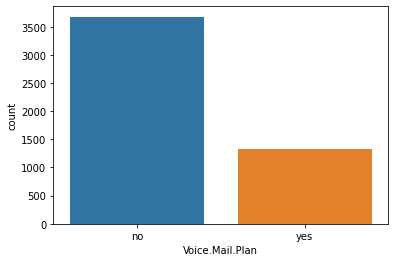

In [ ]:
sns.countplot(x="Voice.Mail.Plan",data=Telco_data)
plt.show()

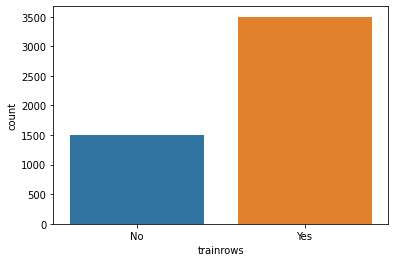

In [ ]:
sns.countplot(x="trainrows",data=Telco_data)
plt.show()

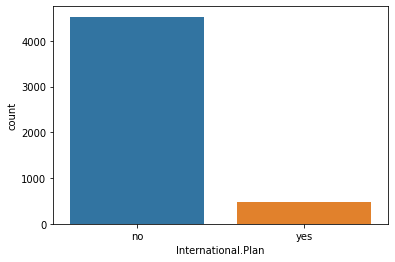

In [ ]:
sns.countplot(x="International.Plan",data=Telco_data)
plt.show()

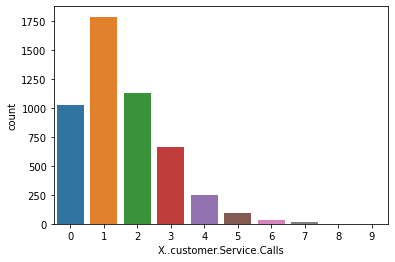

In [ ]:
sns.countplot(x="X..customer.Service.Calls",data=Telco_data)
plt.show()

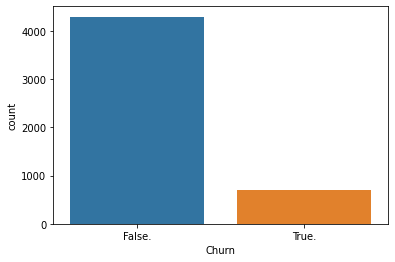

In [ ]:
sns.countplot(x="Churn",data=Telco_data)
plt.show()

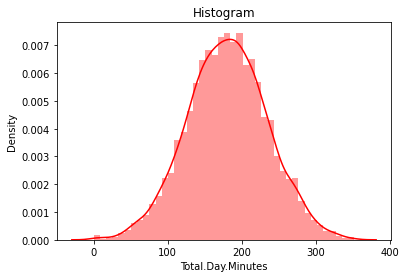

In [ ]:
# Plot a histogram of the total day Minutes
hist1=sns.distplot(Telco_data['Total.Day.Minutes'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

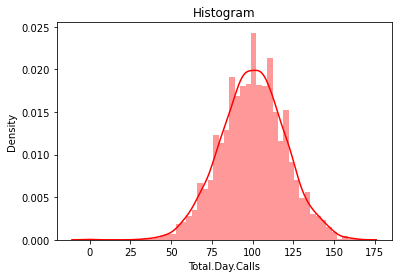

In [ ]:
# Plot a histogram of the total day calls
hist1=sns.distplot(Telco_data['Total.Day.Calls'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

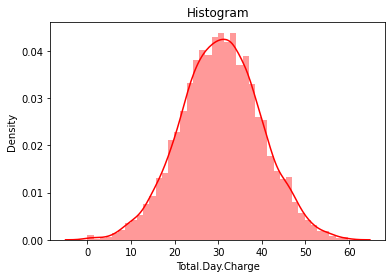

In [ ]:
# Plot a histogram of the total day charge
hist1=sns.distplot(Telco_data['Total.Day.Charge'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

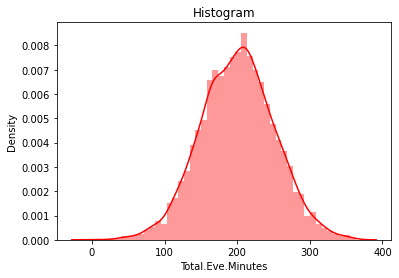

In [ ]:
# Plot a histogram of the total eve Mins
hist1=sns.distplot(Telco_data['Total.Eve.Minutes'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

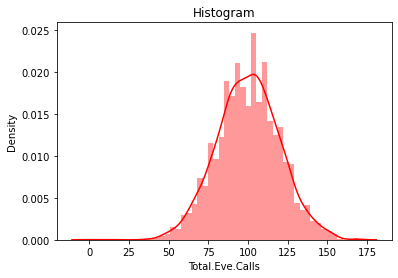

In [ ]:
# Plot a histogram of the total eve Calls
hist1=sns.distplot(Telco_data['Total.Eve.Calls'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

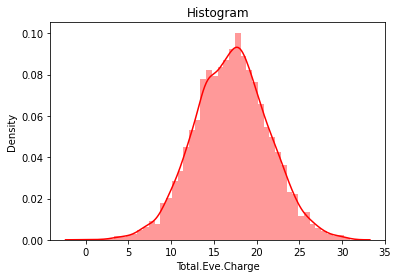

In [ ]:
# Plot a histogram of the total eve Charge
hist1=sns.distplot(Telco_data['Total.Eve.Charge'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

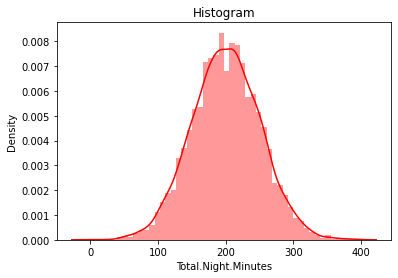

In [ ]:
# Plot a histogram of the total Night Mins
hist1=sns.distplot(Telco_data['Total.Night.Minutes'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

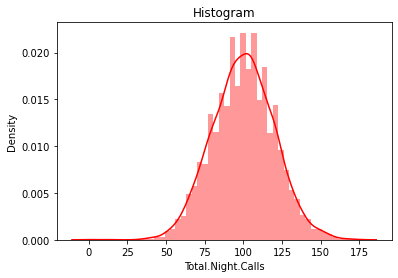

In [ ]:
# Plot a histogram of the total Night Calls
hist1=sns.distplot(Telco_data['Total.Night.Calls'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

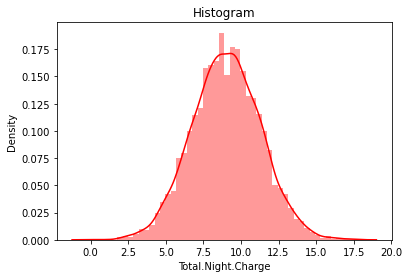

In [ ]:
# Plot a histogram of the total Night Charge
hist1=sns.distplot(Telco_data['Total.Night.Charge'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

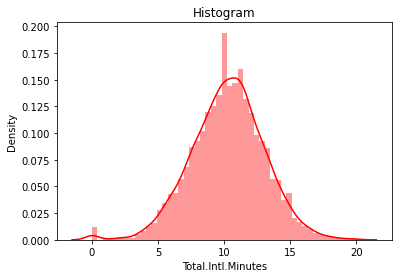

In [ ]:
# Plot a histogram of the total Intl Minutes
hist1=sns.distplot(Telco_data['Total.Intl.Minutes'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

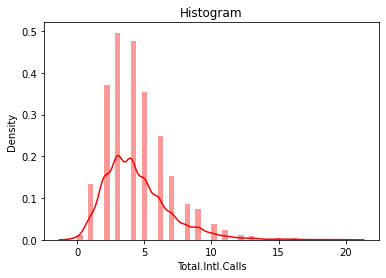

In [ ]:
# Plot a histogram of the total Intl Calls
hist1=sns.distplot(Telco_data['Total.Intl.Calls'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

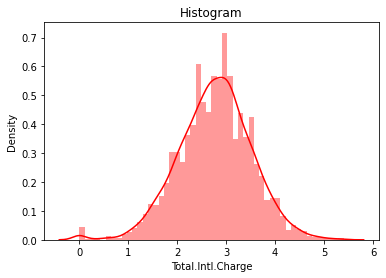

In [ ]:
# Plot a histogram of the total Intl Charge
hist1=sns.distplot(Telco_data['Total.Intl.Charge'],color="Red",hist=True,kde=True)
hist1.set(title='Histogram')
plt.show()

In [ ]:
sns.pairplot(Telco_data,markers=["o","s"])

Output hidden; open in https://colab.research.google.com to view.

let's see the heatmap to understand the correlation between the numeric attributes

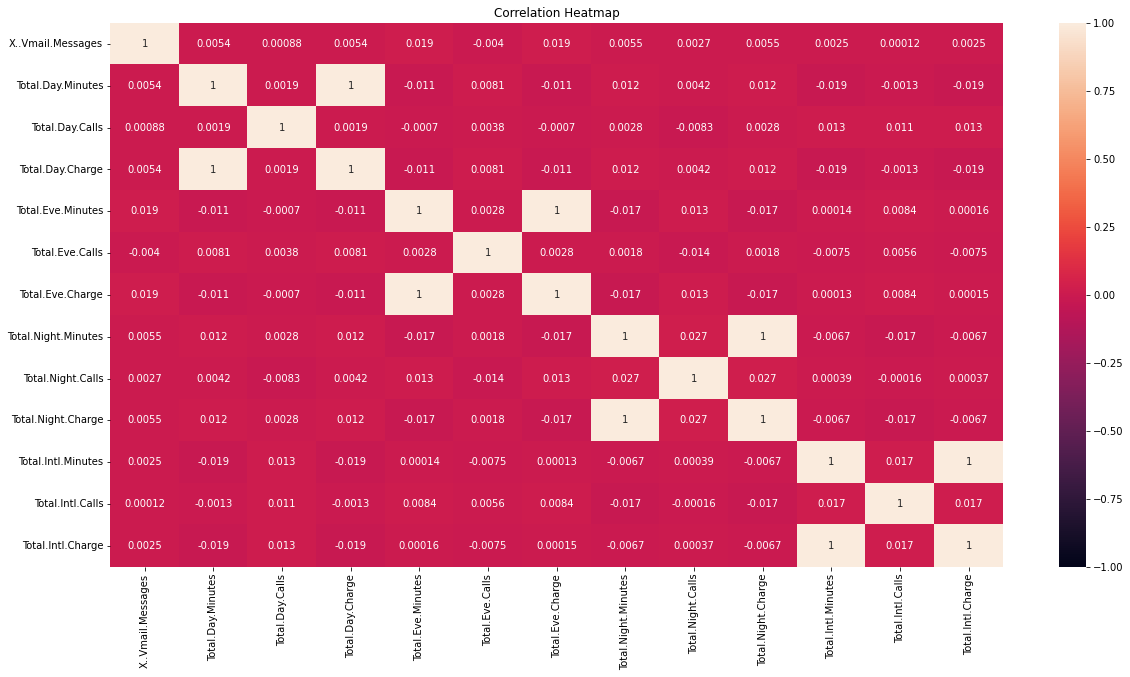

In [ ]:
plt.figure(figsize=(20, 10))
# Store heatmap object in a variable to easily access it when you want to include more features (such as title).
# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap.
heatmap = sns.heatmap(Telco_data.corr(),annot=True,vmax=1,vmin=-1)
# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap');

let's see the box_plot to understand the Outlairs

X..Vmail.Messages          AxesSubplot(0.125,0.71587;0.168478x0.16413)
Total.Day.Minutes       AxesSubplot(0.327174,0.71587;0.168478x0.16413)
Total.Day.Calls         AxesSubplot(0.529348,0.71587;0.168478x0.16413)
Total.Day.Charge        AxesSubplot(0.731522,0.71587;0.168478x0.16413)
Total.Eve.Minutes         AxesSubplot(0.125,0.518913;0.168478x0.16413)
Total.Eve.Calls        AxesSubplot(0.327174,0.518913;0.168478x0.16413)
Total.Eve.Charge       AxesSubplot(0.529348,0.518913;0.168478x0.16413)
Total.Night.Minutes    AxesSubplot(0.731522,0.518913;0.168478x0.16413)
Total.Night.Calls         AxesSubplot(0.125,0.321957;0.168478x0.16413)
Total.Night.Charge     AxesSubplot(0.327174,0.321957;0.168478x0.16413)
Total.Intl.Minutes     AxesSubplot(0.529348,0.321957;0.168478x0.16413)
Total.Intl.Calls       AxesSubplot(0.731522,0.321957;0.168478x0.16413)
Total.Intl.Charge            AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

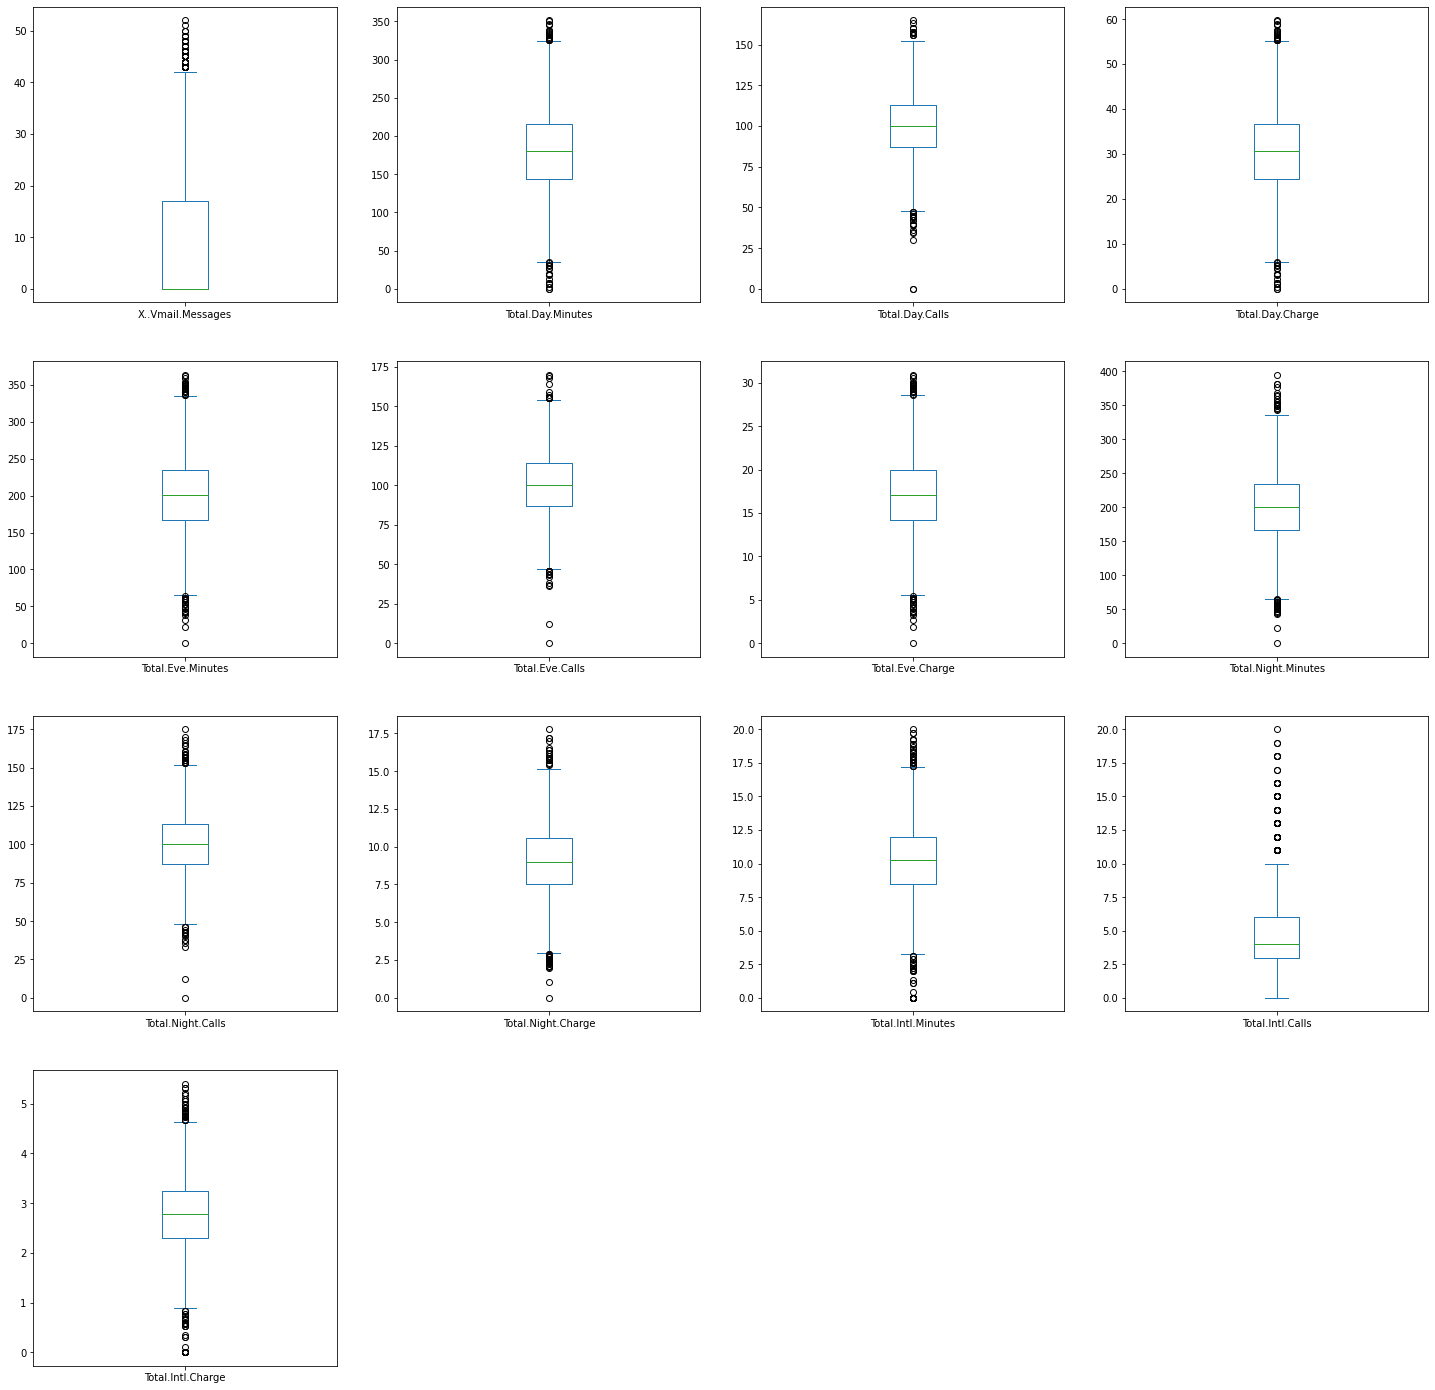

In [ ]:
Telco_data.plot(kind='box',sharex=False,sharey=False,subplots=True,figsize=(25,25),layout=(4,4))

Converting the target attribute into binary class 

In [ ]:
Telco_data['Churn']=np.where(Telco_data['Churn']== 'False.',0,1)

In [ ]:
Telco_data['Churn'].value_counts(normalize=True)*100

0    85.86
1    14.14
Name: Churn, dtype: float64

Store categorical and numerical attribute name

In [ ]:
cat_attr=['X..customer.Service.Calls','International.Plan','Voice.Mail.Plan']

In [ ]:
num_attr = ['X..Vmail.Messages', 'Total.Day.Minutes', 'Total.Day.Calls',
       'Total.Day.Charge', 'Total.Eve.Minutes', 'Total.Eve.Calls',
       'Total.Eve.Charge', 'Total.Night.Minutes', 'Total.Night.Calls',
       'Total.Night.Charge', 'Total.Intl.Minutes', 'Total.Intl.Calls',
       'Total.Intl.Charge']
num_attr

['X..Vmail.Messages',
 'Total.Day.Minutes',
 'Total.Day.Calls',
 'Total.Day.Charge',
 'Total.Eve.Minutes',
 'Total.Eve.Calls',
 'Total.Eve.Charge',
 'Total.Night.Minutes',
 'Total.Night.Calls',
 'Total.Night.Charge',
 'Total.Intl.Minutes',
 'Total.Intl.Calls',
 'Total.Intl.Charge']

Checking the data type of each attribute

In [ ]:
Telco_data.dtypes

International.Plan           category
Voice.Mail.Plan              category
X..Vmail.Messages               int64
X..customer.Service.Calls    category
Churn                           int64
trainrows                      object
Total.Day.Minutes             float64
Total.Day.Calls                 int64
Total.Day.Charge              float64
Total.Eve.Minutes             float64
Total.Eve.Calls                 int64
Total.Eve.Charge              float64
Total.Night.Minutes           float64
Total.Night.Calls               int64
Total.Night.Charge            float64
Total.Intl.Minutes            float64
Total.Intl.Calls                int64
Total.Intl.Charge             float64
dtype: object

Encoding the categorical attributes 

In [ ]:
Telco_data=pd.get_dummies(columns=cat_attr, data =Telco_data, prefix=cat_attr, prefix_sep="_", drop_first=True)

checking the top 5 records 

In [ ]:
Telco_data.head()

,X..Vmail.Messages,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,...,X..customer.Service.Calls_2,X..customer.Service.Calls_3,X..customer.Service.Calls_4,X..customer.Service.Calls_5,X..customer.Service.Calls_6,X..customer.Service.Calls_7,X..customer.Service.Calls_8,X..customer.Service.Calls_9,International.Plan_yes,Voice.Mail.Plan_yes
0,25,0,No,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,26,0,Yes,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,0,0,Yes,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Yes,299.4,71,50.90,61.9,88,5.26,196.9,...,1,0,0,0,0,0,0,0,1,0
4,0,0,Yes,166.7,113,28.34,148.3,122,12.61,186.9,...,0,1,0,0,0,0,0,0,1,0


Spliting the data into train and validation sets based on the column ‘trainrows’. Rows with ‘yes’ belong to 
train data, those with ‘no’ belong to validation data.

In [ ]:
train_data=Telco_data[Telco_data['trainrows']=='Yes']

In [ ]:
validate_data=Telco_data[Telco_data['trainrows']=='No']

checking the dimension of the data


In [ ]:
# checking the dimension of the data
train_data.shape

(3500, 26)

In [ ]:
validate_data.shape

(1500, 26)

In [ ]:
train_data.head()

,X..Vmail.Messages,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,...,X..customer.Service.Calls_2,X..customer.Service.Calls_3,X..customer.Service.Calls_4,X..customer.Service.Calls_5,X..customer.Service.Calls_6,X..customer.Service.Calls_7,X..customer.Service.Calls_8,X..customer.Service.Calls_9,International.Plan_yes,Voice.Mail.Plan_yes
1,26,0,Yes,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,0,0,Yes,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,0,0,Yes,299.4,71,50.90,61.9,88,5.26,196.9,...,1,0,0,0,0,0,0,0,1,0
4,0,0,Yes,166.7,113,28.34,148.3,122,12.61,186.9,...,0,1,0,0,0,0,0,0,1,0
5,0,0,Yes,223.4,98,37.98,220.6,101,18.75,203.9,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
validate_data.head()

,X..Vmail.Messages,Churn,trainrows,Total.Day.Minutes,Total.Day.Calls,Total.Day.Charge,Total.Eve.Minutes,Total.Eve.Calls,Total.Eve.Charge,Total.Night.Minutes,...,X..customer.Service.Calls_2,X..customer.Service.Calls_3,X..customer.Service.Calls_4,X..customer.Service.Calls_5,X..customer.Service.Calls_6,X..customer.Service.Calls_7,X..customer.Service.Calls_8,X..customer.Service.Calls_9,International.Plan_yes,Voice.Mail.Plan_yes
0,25,0,No,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
6,24,0,No,218.2,88,37.09,348.5,108,29.62,212.6,...,0,1,0,0,0,0,0,0,0,1
18,33,0,No,189.7,66,32.25,212.8,65,18.09,165.7,...,0,0,0,0,0,0,0,0,0,1
23,0,0,No,110.4,103,18.77,137.3,102,11.67,189.6,...,1,0,0,0,0,0,0,0,0,0
27,0,0,No,134.3,73,22.83,155.5,100,13.22,102.1,...,0,1,0,0,0,0,0,0,0,0


dropping the Trainrows columns

In [ ]:
train_data.drop("trainrows",axis=1,inplace=True)

In [ ]:
validate_data.drop("trainrows",axis=1,inplace=True)

In [ ]:
train_data.shape

(3500, 25)

In [ ]:
validate_data.shape

(1500, 25)

## Split the data into X and y as well as train & test data

In [ ]:
X=train_data.drop("Churn",axis=1)
y=train_data["Churn"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5271, stratify=y)


In [ ]:
# check the dimension 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2450, 24)
(1050, 24)
(2450,)
(1050,)


Standardrizing all the numeric Attributes in train test as well as validate data

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train[num_attr])

StandardScaler()

In [ ]:
X_train[num_attr]=scaler.transform(X_train[num_attr])
X_test[num_attr]=scaler.transform(X_test[num_attr])
validate_data[num_attr]=scaler.transform(validate_data[num_attr])

In [ ]:
X_train.value_counts().sum()

2450

Defining the evalute function

In [ ]:
def evaluate_model(act, pred):
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred))
    print("Precision: ", precision_score(act, pred))  
    print("f1_score:", f1_score(act,pred))  

## Logistic lasso & Ridge Model

In [ ]:
logistic_model_l1 = LogisticRegression(penalty="l1",solver="saga",class_weight="balanced")
logistic_model_l1.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', penalty='l1', solver='saga')

In [ ]:
# Generating predictions:
train_pred=logistic_model_l1.predict(X_train)
test_pred=logistic_model_l1.predict(X_test)


In [ ]:
train_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
logistic_model_l1.coef_

array([[ 0.388712  ,  0.36855389,  0.05669074,  0.37646391,  0.23487543,
         0.062489  ,  0.20328003,  0.13687689,  0.03124417,  0.16548364,
         0.1494979 , -0.03867936,  0.07541988, -0.04340914, -0.12225725,
        -0.06522874,  2.95887643,  3.72983444,  4.48715306,  1.99283172,
         1.71472346,  0.        ,  2.69363788, -2.10865356]])

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[1773  326]
 [  55  296]]
Accurcay :  0.8444897959183674
Recall   :  0.8433048433048433
Precision:  0.4758842443729904
f1_score: 0.6084275436793423
--Test--
Confusion Matrix 
 [[744 155]
 [ 24 127]]
Accurcay :  0.8295238095238096
Recall   :  0.8410596026490066
Precision:  0.450354609929078
f1_score: 0.5866050808314087


In [ ]:
logistic_model_l2 = LogisticRegression(penalty="l2",solver="saga",class_weight="balanced")
logistic_model_l2.fit(X_train,y_train)

LogisticRegression(class_weight='balanced', solver='saga')

In [ ]:
# Generating predictions:
train_pred=logistic_model_l2.predict(X_train)
test_pred=logistic_model_l2.predict(X_test)


In [ ]:
train_pred

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
logistic_model_l2.coef_

array([[ 0.34654568,  0.35862062,  0.05602721,  0.36128729,  0.21440917,
         0.05914574,  0.20603823,  0.14250425,  0.0371217 ,  0.15162497,
         0.11927691, -0.03994672,  0.09807106, -0.16717324, -0.24826713,
        -0.19510531,  2.7149194 ,  3.3348386 ,  3.63162034,  1.57751806,
         1.30928682,  0.243349  ,  2.59261043, -1.96703838]])

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[1765  334]
 [  58  293]]
Accurcay :  0.84
Recall   :  0.8347578347578347
Precision:  0.46730462519936206
f1_score: 0.5991820040899795
--Test--
Confusion Matrix 
 [[739 160]
 [ 25 126]]
Accurcay :  0.8238095238095238
Recall   :  0.8344370860927153
Precision:  0.4405594405594406
f1_score: 0.5766590389016018


## DecisionTree Classification

In [ ]:
dt_clf = DecisionTreeClassifier(class_weight="balanced")
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced')

In [ ]:
importances = dt_clf.feature_importances_
importances

array([0.03670966, 0.04928283, 0.05477333, 0.18458526, 0.05075568,
       0.02734304, 0.06527562, 0.0304583 , 0.02819086, 0.02831985,
       0.07843972, 0.04563291, 0.01842951, 0.00631542, 0.00085873,
       0.00225866, 0.06060568, 0.06356864, 0.0342877 , 0.        ,
       0.        , 0.        , 0.1177123 , 0.01619629])

In [ ]:
indices = np.argsort(importances)[::-1]
ind_attr_names = X_train.columns
pd.DataFrame([ind_attr_names[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Total.Day.Charge,International.Plan_yes,Total.Intl.Minutes,Total.Eve.Charge,X..customer.Service.Calls_5,X..customer.Service.Calls_4,Total.Day.Calls,Total.Eve.Minutes,Total.Day.Minutes,Total.Intl.Calls,...,Total.Night.Calls,Total.Eve.Calls,Total.Intl.Charge,Voice.Mail.Plan_yes,X..customer.Service.Calls_1,X..customer.Service.Calls_3,X..customer.Service.Calls_2,X..customer.Service.Calls_7,X..customer.Service.Calls_8,X..customer.Service.Calls_9
1,0.184585,0.117712,0.07844,0.065276,0.063569,0.060606,0.054773,0.050756,0.049283,0.045633,...,0.028191,0.027343,0.01843,0.016196,0.006315,0.002259,0.000859,0.0,0.0,0.0


In [ ]:
dt_clf.classes_

array([0, 1])

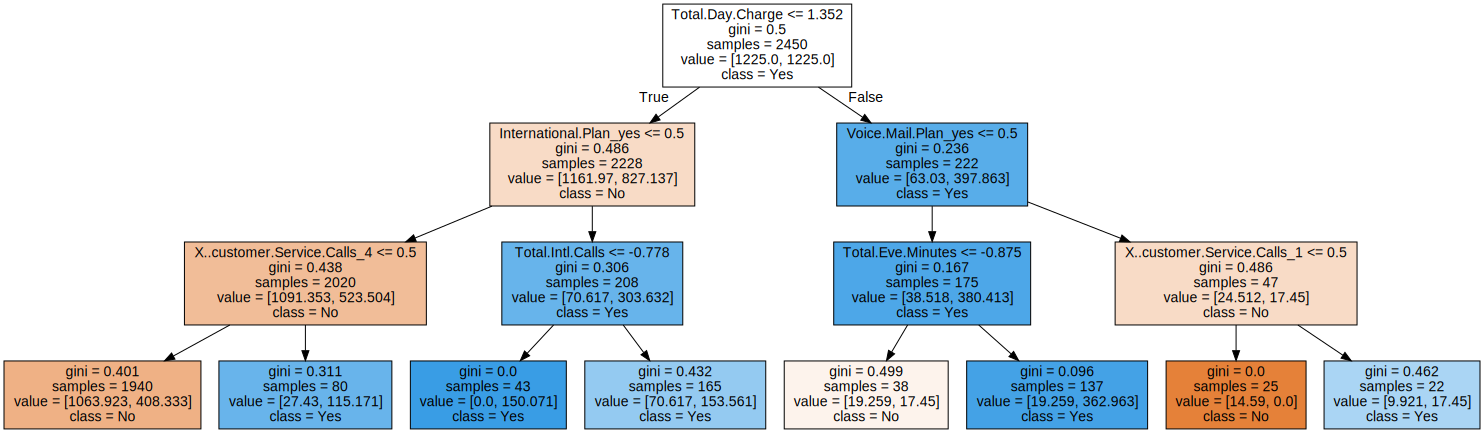

In [ ]:
# Decision Tree Graph explanation
dt_clf2 = DecisionTreeClassifier(max_depth=3,class_weight="balanced") ## change 1,2,3
dt_clf2.fit(X_train, y_train)
dot_data1 = export_graphviz(dt_clf2, 
                           feature_names=ind_attr_names,
                           class_names=['No', 'Yes'], 
                           filled=True) 

graph2 = graphviz.Source(dot_data1) 
graph2

In [ ]:
train_pred_dt = dt_clf2.predict(X_train)
test_pred_dt = dt_clf2.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred_dt)
print("--Test--")
evaluate_model(y_test, test_pred_dt)

--Train--
Confusion Matrix 
 [[1881  218]
 [ 122  229]]
Accurcay :  0.8612244897959184
Recall   :  0.6524216524216524
Precision:  0.5123042505592841
f1_score: 0.5739348370927317
--Test--
Confusion Matrix 
 [[799 100]
 [ 56  95]]
Accurcay :  0.8514285714285714
Recall   :  0.6291390728476821
Precision:  0.48717948717948717
f1_score: 0.5491329479768786


Hyper-parameter tuning using Grid Search and Cross Validation For DecisionTree

In [ ]:
param_grid = {"criterion": ["gini", "entropy"],
              "max_depth": [None, 5],
              "min_samples_leaf": [1, 4],
              "min_samples_split": [1, 4] 
             }

In [ ]:
dt_clf3 = DecisionTreeClassifier(class_weight="balanced")
dt_clf_grid = GridSearchCV(dt_clf3,param_grid ,cv=4)

In [ ]:
dt_clf_grid.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5], 'min_samples_leaf': [1, 4],
                         'min_samples_split': [1, 4]})

In [ ]:
dt_clf_grid.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 4}

In [ ]:
train_pred = dt_clf_grid.predict(X_train)
test_pred = dt_clf_grid.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[2024   75]
 [  87  264]]
Accurcay :  0.9338775510204081
Recall   :  0.7521367521367521
Precision:  0.7787610619469026
f1_score: 0.765217391304348
--Test--
Confusion Matrix 
 [[861  38]
 [ 50 101]]
Accurcay :  0.9161904761904762
Recall   :  0.6688741721854304
Precision:  0.7266187050359713
f1_score: 0.6965517241379311


Building Decision Tree Model using Variable Importance

In [ ]:
importances = dt_clf_grid.best_estimator_.feature_importances_
importances

array([0.03165353, 0.22651807, 0.0066643 , 0.03869306, 0.0443329 ,
       0.        , 0.01227186, 0.02434706, 0.        , 0.        ,
       0.        , 0.04910441, 0.11627603, 0.01247633, 0.        ,
       0.        , 0.09238944, 0.10345926, 0.05786767, 0.        ,
       0.        , 0.        , 0.18394609, 0.        ])

In [ ]:
indices = np.argsort(importances)[::-1]
print(indices)

[ 1 22 12 17 16 18 11  4  3  0  7 13  6  2 14 15 10  9  8  5 19 20 21 23]


In [ ]:
select = indices[0:9]
print(select)

[ 1 22 12 17 16 18 11  4  3]


In [ ]:
dt_clf4 = DecisionTreeClassifier(criterion= 'entropy', 
                                max_depth= 5, 
                                min_samples_leaf= 1,
                                min_samples_split= 4,
                                 class_weight="balanced")

In [ ]:
dt_clf4 = dt_clf4.fit(X_train.values[:,select], y_train)

In [ ]:
train_pred = dt_clf4.predict(X_train.values[:,select])
test_pred = dt_clf4.predict(X_test.values[:,select])

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[1981  118]
 [  85  266]]
Accurcay :  0.9171428571428571
Recall   :  0.7578347578347578
Precision:  0.6927083333333334
f1_score: 0.7238095238095238
--Test--
Confusion Matrix 
 [[842  57]
 [ 48 103]]
Accurcay :  0.9
Recall   :  0.6821192052980133
Precision:  0.64375
f1_score: 0.6623794212218651


## RandomForestClassifier Model

In [ ]:
rf_clf = RandomForestClassifier(class_weight="balanced")

In [ ]:
rf_clf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [ ]:
importances1 = rf_clf.feature_importances_
print(importances1)

indices = np.argsort(importances1)[::-1]
print(indices)

[0.02800069 0.12568182 0.04070423 0.1267881  0.05915087 0.03863157
 0.06081311 0.05045196 0.03741782 0.05266441 0.05211376 0.04562279
 0.04922249 0.00755463 0.00785707 0.00417951 0.04390129 0.03792478
 0.01727954 0.00242992 0.00124874 0.0004366  0.09374015 0.01618413]
[ 3  1 22  6  4  9 10  7 12 11 16  2  5 17  8  0 18 23 14 13 15 19 20 21]


In [ ]:
indices1 = np.argsort(importances1)[::-1]
ind_attr_names1 = X_train.columns
pd.DataFrame([ind_attr_names1[indices], np.sort(importances1)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Total.Day.Charge,Total.Day.Minutes,International.Plan_yes,Total.Eve.Charge,Total.Eve.Minutes,Total.Night.Charge,Total.Intl.Minutes,Total.Night.Minutes,Total.Intl.Charge,Total.Intl.Calls,...,Total.Night.Calls,X..Vmail.Messages,X..customer.Service.Calls_6,Voice.Mail.Plan_yes,X..customer.Service.Calls_2,X..customer.Service.Calls_1,X..customer.Service.Calls_3,X..customer.Service.Calls_7,X..customer.Service.Calls_8,X..customer.Service.Calls_9
1,0.126788,0.125682,0.09374,0.060813,0.059151,0.052664,0.052114,0.050452,0.049222,0.045623,...,0.037418,0.028001,0.01728,0.016184,0.007857,0.007555,0.00418,0.00243,0.001249,0.000437


In [ ]:
train_pred = rf_clf.predict(X_train)
test_pred = rf_clf.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[2099    0]
 [   0  351]]
Accurcay :  1.0
Recall   :  1.0
Precision:  1.0
f1_score: 1.0
--Test--
Confusion Matrix 
 [[897   2]
 [ 60  91]]
Accurcay :  0.940952380952381
Recall   :  0.6026490066225165
Precision:  0.978494623655914
f1_score: 0.7459016393442622


 Hyper-parameter tuning using Grid Search and Cross Validation For RandomForest

In [ ]:
param_grid = {"n_estimators" : [50, 100],
              "max_depth" : [1,6],
              "max_features" : [3, 10],
              "min_samples_leaf" : [1, 2, 4]}

In [ ]:
rf_clf2 = RandomForestClassifier(class_weight="balanced")

In [ ]:
clf_grid_rf = GridSearchCV(rf_clf2,param_grid,cv=5)

In [ ]:
clf_grid_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'max_depth': [1, 6], 'max_features': [3, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [50, 100]})

In [ ]:

clf_grid_rf.best_params_

{'max_depth': 6, 'max_features': 10, 'min_samples_leaf': 2, 'n_estimators': 50}

In [ ]:
importances = clf_grid_rf.best_estimator_.feature_importances_
importances

array([0.03125699, 0.15506668, 0.0122522 , 0.15643534, 0.04120138,
       0.0120384 , 0.03805988, 0.01778801, 0.00939616, 0.01622238,
       0.03187364, 0.04099818, 0.03362676, 0.00965924, 0.00233239,
       0.00049664, 0.08013164, 0.07939744, 0.03046251, 0.00093314,
       0.        , 0.        , 0.18342064, 0.01695039])

In [ ]:
indices = np.argsort(importances)[::-1]
print(indices)

[22  3  1 16 17  4 11  6 12 10  0 18  7 23  9  2  5 13  8 14 19 15 20 21]


In [ ]:
select = indices[0:10]
print(select)

[22  3  1 16 17  4 11  6 12 10]


In [ ]:
rf_clf3 = RandomForestClassifier(max_depth=6, max_features=10,
                              min_samples_leaf=1, n_estimators=50,
                              class_weight="balanced")

In [ ]:
rf_clf4 = rf_clf3.fit(X_train.values[:,select], y_train)

In [ ]:
train_pred = rf_clf4.predict(X_train.values[:,select])
test_pred = rf_clf4.predict(X_test.values[:,select])

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[2009   90]
 [  70  281]]
Accurcay :  0.9346938775510204
Recall   :  0.8005698005698005
Precision:  0.7574123989218329
f1_score: 0.778393351800554
--Test--
Confusion Matrix 
 [[853  46]
 [ 44 107]]
Accurcay :  0.9142857142857143
Recall   :  0.7086092715231788
Precision:  0.6993464052287581
f1_score: 0.7039473684210525


## Adaboost 

In [ ]:
adaboost_clf = AdaBoostClassifier()

In [ ]:
adaboost_clf.fit(X_train,y_train)

AdaBoostClassifier()

In [ ]:
train_pred = adaboost_clf.predict(X_train)
test_pred = adaboost_clf.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[2051   48]
 [ 191  160]]
Accurcay :  0.9024489795918368
Recall   :  0.45584045584045585
Precision:  0.7692307692307693
f1_score: 0.5724508050089446
--Test--
Confusion Matrix 
 [[869  30]
 [ 95  56]]
Accurcay :  0.8809523809523809
Recall   :  0.3708609271523179
Precision:  0.6511627906976745
f1_score: 0.4725738396624473


XGboost

In [ ]:
XGB_clf = XGBClassifier()
XGB_clf.fit(X_train,y_train)

XGBClassifier()

In [ ]:
train_pred = XGB_clf.predict(X_train)
test_pred = XGB_clf.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[2098    1]
 [  85  266]]
Accurcay :  0.9648979591836735
Recall   :  0.7578347578347578
Precision:  0.9962546816479401
f1_score: 0.86084142394822
--Test--
Confusion Matrix 
 [[893   6]
 [ 55  96]]
Accurcay :  0.9419047619047619
Recall   :  0.6357615894039735
Precision:  0.9411764705882353
f1_score: 0.7588932806324111


Hyper Parameter tuning for XGBoost

In [ ]:
XGB_clf1=XGBClassifier()

In [ ]:
param_grid = {
    'colsample_bytree': np.linspace(0.8, 0.9, 2),
    'n_estimators': [50, 100],
    'max_depth': [5, 6]}


In [ ]:
XGB_clf2=GridSearchCV(estimator=XGB_clf1, param_grid=param_grid, cv=4)

In [ ]:
XGB_clf2.fit(X_train,y_train)

GridSearchCV(cv=4, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': array([0.8, 0.9]),
                         'max_depth': [5, 6], 'n_estimators': [50, 100]})

In [ ]:
best_xgb_model = XGB_clf2.best_estimator_
best_xgb_model

XGBClassifier(colsample_bytree=0.9, max_depth=5)

In [ ]:
train_pred = best_xgb_model.predict(X_train)
test_pred = best_xgb_model.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[2099    0]
 [  55  296]]
Accurcay :  0.9775510204081632
Recall   :  0.8433048433048433
Precision:  1.0
f1_score: 0.9149922720247295
--Test--
Confusion Matrix 
 [[891   8]
 [ 49 102]]
Accurcay :  0.9457142857142857
Recall   :  0.6754966887417219
Precision:  0.9272727272727272
f1_score: 0.7816091954022989


Extracting the important features

In [ ]:
best_xgb_model.feature_importances_

array([0.05636993, 0.05266548, 0.01173391, 0.06659418, 0.04286379,
       0.01510539, 0.03851926, 0.02255734, 0.01333474, 0.03103666,
       0.04647509, 0.0681498 , 0.03912031, 0.01621195, 0.01663532,
       0.01835927, 0.07501332, 0.09125795, 0.06347188, 0.        ,
       0.        , 0.        , 0.10611729, 0.10840709], dtype=float32)

In [ ]:
importances = best_xgb_model.feature_importances_
indices = np.argsort(importances)
print(indices)

[20 19 21  2  8  5 13 14 15  7  9  6 12  4 10  1  0 18  3 11 16 17 22 23]


In [ ]:
indices = np.argsort(importances)[::-1] # np.argsort returns the indices that would sort an array.
pd.DataFrame([X_train.columns[indices], np.sort(importances)[::-1]])

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,Voice.Mail.Plan_yes,International.Plan_yes,X..customer.Service.Calls_5,X..customer.Service.Calls_4,Total.Intl.Calls,Total.Day.Charge,X..customer.Service.Calls_6,X..Vmail.Messages,Total.Day.Minutes,Total.Intl.Minutes,...,Total.Night.Minutes,X..customer.Service.Calls_3,X..customer.Service.Calls_2,X..customer.Service.Calls_1,Total.Eve.Calls,Total.Night.Calls,Total.Day.Calls,X..customer.Service.Calls_9,X..customer.Service.Calls_7,X..customer.Service.Calls_8
1,0.108407,0.106117,0.091258,0.075013,0.06815,0.066594,0.063472,0.05637,0.052665,0.046475,...,0.022557,0.018359,0.016635,0.016212,0.015105,0.013335,0.011734,0.0,0.0,0.0


## Gradient Boosting Machines

In [ ]:
gbm_clf =  GradientBoostingClassifier()

In [ ]:
gbm_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [ ]:
train_pred = gbm_clf.predict(X_train)
test_pred = gbm_clf.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[2099    0]
 [  77  274]]
Accurcay :  0.9685714285714285
Recall   :  0.7806267806267806
Precision:  1.0
f1_score: 0.8768
--Test--
Confusion Matrix 
 [[893   6]
 [ 56  95]]
Accurcay :  0.940952380952381
Recall   :  0.6291390728476821
Precision:  0.9405940594059405
f1_score: 0.753968253968254


## Support Vector Machines

In [ ]:
 #Create a SVC classifier using a linear kernel
 linear_svm = SVC(kernel="linear",C=1,class_weight="balanced")
 linear_svm.fit(X=X_train,y=y_train)

SVC(C=1, class_weight='balanced', kernel='linear')

In [ ]:
train_pred = linear_svm.predict(X_train)
test_pred = linear_svm.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[1760  339]
 [  55  296]]
Accurcay :  0.8391836734693877
Recall   :  0.8433048433048433
Precision:  0.46614173228346456
f1_score: 0.6004056795131846
--Test--
Confusion Matrix 
 [[742 157]
 [ 21 130]]
Accurcay :  0.8304761904761905
Recall   :  0.8609271523178808
Precision:  0.4529616724738676
f1_score: 0.593607305936073


In [ ]:
#Non Linear SVM (RBF)
svc = SVC(kernel="rbf",gamma=0.01,C=10,class_weight="balanced")
svc.fit(X_train,y_train)

SVC(C=10, class_weight='balanced', gamma=0.01)

In [ ]:
train_pred = svc.predict(X_train)
test_pred = svc.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[1852  247]
 [  51  300]]
Accurcay :  0.8783673469387755
Recall   :  0.8547008547008547
Precision:  0.5484460694698354
f1_score: 0.6681514476614698
--Test--
Confusion Matrix 
 [[778 121]
 [ 24 127]]
Accurcay :  0.861904761904762
Recall   :  0.8410596026490066
Precision:  0.5120967741935484
f1_score: 0.6365914786967418


SVM with Grid Search for Paramater Tuning

In [ ]:
svc_grid=SVC(class_weight="balanced")
param_grid = { 
                'C': [0.0001, 0.001,0.01, 0.1, 1, 10, 100 ],
                'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                'kernel':['linear','rbf','poly']
             }

svc_cv_grid = GridSearchCV(estimator = svc_grid, param_grid=param_grid, cv = 3)

In [ ]:
svc_cv_grid.fit(X=X_train, y=y_train)

GridSearchCV(cv=3, estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
svc_cv_grid.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

In [ ]:
rbf_svm = SVC(kernel="rbf",gamma=0.1,C=1,class_weight="balanced")

In [ ]:
rbf_svm.fit(X_train,y_train)

SVC(C=1, class_weight='balanced', gamma=0.1)

In [ ]:
train_pred = rbf_svm.predict(X_train)
test_pred = rbf_svm.predict(X_test)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_test, test_pred)

--Train--
Confusion Matrix 
 [[2013   86]
 [  33  318]]
Accurcay :  0.9514285714285714
Recall   :  0.905982905982906
Precision:  0.7871287128712872
f1_score: 0.8423841059602649
--Test--
Confusion Matrix 
 [[854  45]
 [ 45 106]]
Accurcay :  0.9142857142857143
Recall   :  0.7019867549668874
Precision:  0.7019867549668874
f1_score: 0.7019867549668874


we can see from the above model that logistic Regression(lasso) model is giving the best output 

spliting the validate data into X and y

In [ ]:
validate_data_np=validate_data.to_numpy()
X_val,y_val=validate_data_np[:,:-1], validate_data_np[:,-1]
X_val.shape, y_val.shape

((1500, 24), (1500,))

predict in the validation data

In [ ]:
train_pred = logistic_model_l1.predict(X_train)
val_pred = logistic_model_l1.predict(X_val)

In [ ]:
print("--Train--")
evaluate_model(y_train, train_pred)
print("--Test--")
evaluate_model(y_val, val_pred)

--Train--
Confusion Matrix 
 [[1773  326]
 [  55  296]]
Accurcay :  0.8444897959183674
Recall   :  0.8433048433048433
Precision:  0.4758842443729904
f1_score: 0.6084275436793423
--Test--
Confusion Matrix 
 [[773 329]
 [176 222]]
Accurcay :  0.6633333333333333
Recall   :  0.5577889447236181
Precision:  0.4029038112522686
f1_score: 0.46786090621707055
